# Лабораторная работа по заданию №  4. Алгоритмы безусловной нелинейной оптимизации. Стохастические и метаэвристические алгоритмы

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, leastsq, basinhopping, differential_evolution

### Объявление базовых функций, создание исходного массива

In [19]:
x_array=[]
y_array=[]

def rat_approx(x, a, b, c, d):
    return (a*x+b)/(x**2+x*c+d)

def main_func(x):
    sigma=np.random.normal()    
    def f_x_func(x):
        return 1/(x**2-3*x+2)    
    if f_x_func(x)<-100:
        y=-100+sigma
    if -100<=f_x_func(x)<=100:
        y=f_x_func(x)+sigma    
    if f_x_func(x)>100:
        y=100+sigma
    return y

def sq_function_rat(params):
    a, b, c, d = params
    summ=0
    for i in range (1000):
        summ=summ+(rat_approx(x_array[i], a, b, c, d)-y_array[i])**2
    return summ

for i in range (1000):    
    x=3*i/1000
    y=main_func(x)    
    x_array.append(x)
    y_array.append(y)

### Рациональная аппроксимация с минимизацией методом Нелдера-Мида

In [20]:
params=[0.5, 0.5, 0.5, 0.5]
res = minimize(sq_function_rat, params,  method='nelder-mead',
    options={'xtol': 0.001, 'disp': True})
nm_rat=res.x
nm_rat_approx_array=[ rat_approx(x, nm_rat[0], nm_rat[1], nm_rat[2], nm_rat[3]) for x in x_array]
print('\nМетод Нелдера-Мида:\na='+str(nm_rat[0])+', b='+str(nm_rat[1])+', c='+str(nm_rat[2])+', d='+str(nm_rat[3]))

Optimization terminated successfully.
         Current function value: 135886.153972
         Iterations: 371
         Function evaluations: 617

Метод Нелдера-Мида:
a=-1.007894684460146, b=1.008405380582237, c=-2.0009915927591244, d=1.0010079784466637


### Рациональная аппроксимация с минимизацией методом Левенбега-Марквардта

In [21]:
#Переписываю аппроксимирующую функцию, потому что готовый метод не принимает ее в общем виде
def sq_function_rat_for_lm(params, x, y):
    a = params[0]
    b = params[1]
    c = params[2]
    d = params[3]
    return ((a*np.array(x)+b)/(np.array(x)**2+np.array(x)*c+d) - np.array(y))
           
res=leastsq(sq_function_rat_for_lm, params, args=(x_array, y_array), full_output = True)
lm_rat=res[0]
lm_rat_approx_array=[rat_approx(x, nm_rat[0], nm_rat[1], nm_rat[2], nm_rat[3]) for x in x_array]
print('\nМетод Левенберга-Марквардта:\na='+str(lm_rat[0])+', b='+str(lm_rat[1])+', c='+str(lm_rat[2])+', d='+str(lm_rat[3]))
print('Calculations: '+str(res[2]['nfev'])+'\n')


Метод Левенберга-Марквардта:
a=-1.0088155804854941, b=1.009306254843257, c=-2.000912464093124, d=1.0009288455982153
Calculations: 736



### Рациональная аппроксимация с минимизацией методом имитации отжига

In [22]:
res = basinhopping(sq_function_rat, params, niter=10)
bh_rat=res.x
bh_rat_approx_array=[ rat_approx(x, bh_rat[0], bh_rat[1], bh_rat[2], bh_rat[3]) for x in x_array]
print('\nМетод имитации отжига:\na='+str(bh_rat[0])+', b='+str(bh_rat[1])+', c='+str(bh_rat[2])+', d='+str(bh_rat[3]))
print('Iterations: '+str(res.nit))
print('Evaluations: '+str(res.nfev))


Метод имитации отжига:
a=-0.9642149119709752, b=0.9646670589572199, c=-2.001101170139631, d=1.0011158355833907
Iterations: 10
Evaluations: 7059


### Рациональная аппроксимация с минимизацией методом диффернциальной эволюции

In [23]:
#От указанного диапазона очень сильно зависит насколько будет пойман разрыв искомой функции
#bounds = [(-1,2), (-1,2), (-1,2), (-1,2)]#Так аппроксимация выглядит как прямая
bounds = [(-2,2), (-2,2), (-2,2), (-2,2)]#А так мы ловим разрыв и аппроксимация выглядит как в предыдущих методах
res = differential_evolution(sq_function_rat, bounds, maxiter=10)
de_rat=res.x
de_rat_approx_array=[rat_approx(x, de_rat[0], de_rat[1], de_rat[2], de_rat[3]) for x in x_array]
print('\nМетод диффернциальной эволюции:\na='+str(de_rat[0])+', b='+str(de_rat[1])+', c='+str(de_rat[2])+', d='+str(de_rat[3]))
print('Iterations: '+str(res.nit))
print('Evaluations: '+str(res.nfev))



Метод диффернциальной эволюции:
a=-0.5599700118442068, b=0.5597525649649838, c=-1.997671853309595, d=0.997678209365794
Iterations: 4
Evaluations: 1000


### Вывод обобщенного графика

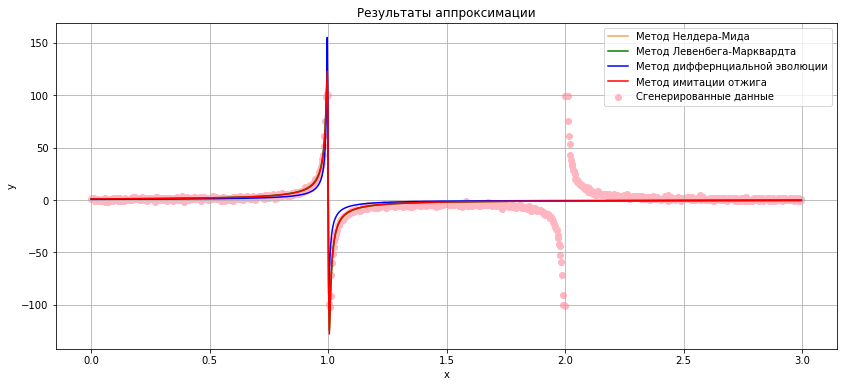

In [24]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, nm_rat_approx_array, color='SandyBrown', label='Метод Нелдера-Мида')
ax.plot(x_array, lm_rat_approx_array, color='green', label='Метод Левенбега-Марквардта')
ax.plot(x_array, de_rat_approx_array, color='blue', label='Метод диффернциальной эволюции')
ax.plot(x_array, bh_rat_approx_array, color='red', label='Метод имитации отжига')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
leg = plt.legend()
ax.set(xlabel='x', ylabel='y',title='Результаты аппроксимации')
ax.grid()
plt.show()